<a href="https://colab.research.google.com/github/phatnguyenthuan1502/Remaining-Useful-Life-Assessment-of-Bypass-and-Blocking-Diodes-in-Photovoltaic-Arrays/blob/main/WT_CNN_time_series_analysis_(data_0)(split_0)(WT_use_cA_and_cD)(WT_1_level)(CNN_uses_LeakyReLU)(1_fully_connected_layers)(find_LC_from_temp_and_Nf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
!pip install openpyxl

In [105]:
import numpy as np
from sklearn.model_selection import train_test_split

In [106]:
import pandas as pd
book = pd.ExcelFile('Data for ML TT-DB0.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

temp = sheet.loc[:,"Temperature"]
nf = sheet.loc[:,"Nf"]
lc = sheet.loc[:,"LC"]


print(pd.Series(temp).array)
print(pd.Series(nf).array)
print(pd.Series(lc).array)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[41090.5061075265, 39607.9167484446, 39237.7021284893, 38280.1016563549,
 49376.1002417963, 36766.2488161939,  35987.539636953,   37974.03129662,
 34512.2493018107, 48315.0959072694,
 ...
 53365.4528603779, 37203.2022351574, 50240.0562554178, 40441.3650671086,
 41569.4387577175, 53495.5587959451, 46559.4539687279, 45999.9230542643,
 35568.2691226242, 35616.6976337195]
Length: 485, dtype: float64
<PandasArray>
[3.65047827854631e-05, 3.78712167450439e-05, 3.82285383350952e-05,
 3.91848489187851e-05, 9.11372096614223e-05, 4.07982877855985e-05,
 4.16810933765463e-05, 6.58344640965869e-05, 4.34628292952584e-05,
  0.00013453352162387,
 ...
   0.0001218016460388, 4.03191099120625e-05, 9.95221815552966e-06,
 1.23635787063641e-05, 6.01

In [107]:
temp = pd.Series(temp).array
nf = pd.Series(nf).array
lc = pd.Series(lc).array

print(temp)
print(nf)
print(lc)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[41090.5061075265, 39607.9167484446, 39237.7021284893, 38280.1016563549,
 49376.1002417963, 36766.2488161939,  35987.539636953,   37974.03129662,
 34512.2493018107, 48315.0959072694,
 ...
 53365.4528603779, 37203.2022351574, 50240.0562554178, 40441.3650671086,
 41569.4387577175, 53495.5587959451, 46559.4539687279, 45999.9230542643,
 35568.2691226242, 35616.6976337195]
Length: 485, dtype: float64
<PandasArray>
[3.65047827854631e-05, 3.78712167450439e-05, 3.82285383350952e-05,
 3.91848489187851e-05, 9.11372096614223e-05, 4.07982877855985e-05,
 4.16810933765463e-05, 6.58344640965869e-05, 4.34628292952584e-05,
  0.00013453352162387,
 ...
   0.0001218016460388, 4.03191099120625e-05, 9.95221815552966e-06,
 1.23635787063641e-05, 6.01

In [108]:
temp_new = []
for str_temp in temp:
  str_new = str_temp.replace("TT ","")
  str_new = str_new.replace("'","")
  temp_new.append(int(str_new))

In [109]:
temp_new

[41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 114,
 117,
 120,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 95,
 98,
 101,
 104,
 107,
 110,
 113,
 116,
 119,
 122,
 125,
 102,
 105,
 108,
 111,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 42,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 39,
 42,


In [110]:
nf = nf/1000

print(nf)

<PandasArray>
[41.090506107526494,   39.6079167484446, 39.237702128489296,
   38.2801016563549,   49.3761002417963,   36.7662488161939,
    35.987539636953,     37.97403129662,   34.5122493018107,
   48.3150959072694,
 ...
  53.36545286037791,   37.2032022351574, 50.240056255417805,
   40.4413650671086,   41.5694387577175,   53.4955587959451,
   46.5594539687279,   45.9999230542643,   35.5682691226242,
 35.616697633719504]
Length: 485, dtype: float64


In [111]:
lc = lc*1000000

print(lc)

<PandasArray>
[  36.5047827854631,   37.8712167450439, 38.228538335095195,
   39.1848489187851,   91.1372096614223,   40.7982877855985,
   41.6810933765463,   65.8344640965869,   43.4628292952584,
    134.53352162387,
 ...
     121.8016460388,   40.3191099120625,   9.95221815552966,
   12.3635787063641,   60.1403356579085, 121.50541365113601,
   96.6506180038638,  97.82625059375701,   14.0574734822269,
 42.115078029578406]
Length: 485, dtype: float64


In [112]:
temp_new = np.array(temp_new)
nf = np.array(nf)
lc = np.array(lc)

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from numpy import array
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import tensorflow as tf
import pywt

In [114]:
def get_wave(data, wavelet, num_level, mode):
  return pywt.wavedec(data, wavelet, level = num_level, mode = mode)

In [115]:
wavelet = 'db1'
mode = 'periodic'
num_level = 1

In [116]:
a = [1,2,3,4,5,6,7,8,9]
get_wave(a, wavelet, num_level, mode)

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172,  7.07106781]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678,  5.65685425])]

In [117]:
a = [1,2]
get_wave(a, wavelet, num_level, mode)

[array([2.12132034]), array([-0.70710678])]

In [118]:
a = [3,4]
get_wave(a, wavelet, num_level, mode)

[array([4.94974747]), array([-0.70710678])]

In [119]:
a = [5,6]
get_wave(a, wavelet, num_level, mode)

[array([7.77817459]), array([-0.70710678])]

In [120]:
a = [7,8]
get_wave(a, wavelet, num_level, mode)

[array([10.60660172]), array([-0.70710678])]

In [121]:
a = [9,1]
get_wave(a, wavelet, num_level, mode)

[array([7.07106781]), array([5.65685425])]

In [122]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [123]:
# define input sequence
in_seq1 = temp_new
in_seq2 = nf
out_seq = lc
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(485, 1, 2) (485,)
[[41.         41.09050611]] 36.5047827854631
[[44.         39.60791675]] 37.8712167450439
[[47.         39.23770213]] 38.228538335095195
[[50.         38.28010166]] 39.1848489187851
[[53.         49.37610024]] 91.1372096614223
[[56.         36.76624882]] 40.7982877855985
[[59.         35.98753964]] 41.6810933765463
[[62.        37.9740313]] 65.8344640965869
[[65.        34.5122493]] 43.4628292952584
[[68.         48.31509591]] 134.53352162387
[[71.         43.99309465]] 125.019620548907
[[74.         46.27433095]] 140.466644605959
[[77.         39.42034014]] 126.838073506385
[[80.         43.68792463]] 148.782530979869
[[83.         46.87624493]] 159.995750744629
[[86.         49.29432037]] 172.43365840586898
[[89.         42.30730843]] 153.637757677686
[[92.        47.4898895]] 178.985465950395
[[40.         69.05736232]] 144.807152549981
[[43.         59.21081419]] 126.66605082537001
[[46.         54.28823182]] 119.731289494877
[[49.         43.15276192]] 81.107207

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False)

In [125]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)

In [126]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

348
348
88
88
49
49


In [127]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [128]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [129]:
for i in range(len(X_train)):
	print(X_train[i], y_train[i])

[[41.       41.090508]] 36.504784
[[44.       39.607918]] 37.871216
[[47.     39.2377]] 38.22854
[[50.     38.2801]] 39.18485
[[53.     49.3761]] 91.13721
[[56.      36.76625]] 40.798286
[[59.      35.98754]] 41.681095
[[62.      37.97403]] 65.834465
[[65.      34.51225]] 43.46283
[[68.       48.315098]] 134.53352
[[71.       43.993095]] 125.01962
[[74.      46.27433]] 140.46664
[[77.      39.42034]] 126.83807
[[80.       43.687923]] 148.78253
[[83.       46.876244]] 159.99576
[[86.      49.29432]] 172.43365
[[89.      42.30731]] 153.63776
[[92.      47.48989]] 178.98546
[[40.       69.057365]] 144.80716
[[43.       59.210815]] 126.66605
[[46.      54.28823]] 119.73129
[[49.       43.152763]] 81.10721
[[52.      45.24866]] 99.450455
[[55.       41.307056]] 84.731285
[[58.       40.438698]] 86.55076
[[61.       48.656235]] 133.59029
[[64.      38.76669]] 90.28369
[[67.      43.69458]] 125.87374
[[70.       42.783318]] 128.55478
[[73.       36.552757]] 95.752014
[[76.       33.489403]] 7

In [130]:
for i in range(len(X_val)):
	print(X_val[i], y_val[i])

[[71.       52.938915]] 170.00726
[[74.      45.37029]] 154.286
[[77.      47.62028]] 167.99565
[[80.       52.914326]] 188.98474
[[83.       46.053455]] 173.71118
[[86.       40.973133]] 134.2343
[[36.      44.76422]] 33.508904
[[39.       60.483284]] 132.26794
[[42.      82.58849]] 169.51514
[[45.      97.62819]] 184.37299
[[48.      87.19993]] 172.0185
[[ 51.      110.56135]] 194.46217
[[ 54.      116.46499]] 201.77737
[[ 57.      131.06876]] 209.81354
[[ 60.      137.02846]] 218.93263
[[ 63.      125.83087]] 222.5209
[[66.      92.66365]] 210.4385
[[69.      80.20182]] 205.731
[[72.     82.3818]] 212.42557
[[75.      77.80698]] 212.06325
[[78.       82.848564]] 223.29898
[[81.       77.809425]] 224.9085
[[84.      79.92167]] 231.47664
[[87.      75.29369]] 232.42319
[[90.       55.464153]] 207.34113
[[93.       49.227394]] 203.13892
[[96.      48.65791]] 195.24062
[[99.       44.765915]] 189.8766
[[102.       52.08219]] 220.80484
[[105.        33.778305]] 148.024
[[38.       76.887

In [131]:
train_temp_wave = np.array(get_wave(X_train.T[0][0], wavelet, num_level, mode))
train_nf_wave = np.array(get_wave(X_train.T[1][0], wavelet, num_level, mode))
train_lc_wave = np.array(get_wave(y_train, wavelet, num_level, mode))
val_temp_wave = np.array(get_wave(X_val.T[0][0], wavelet, num_level, mode))
val_nf_wave = np.array(get_wave(X_val.T[1][0], wavelet, num_level, mode))
val_lc_wave = np.array(get_wave(y_val, wavelet, num_level, mode))
test_temp_wave = np.array(get_wave(X_test.T[0][0], wavelet, num_level, mode))
test_nf_wave = np.array(get_wave(X_test.T[1][0], wavelet, num_level, mode))
test_lc_wave = np.array(get_wave(y_test, wavelet, num_level, mode))

In [132]:
train_temp_wave_new = np.concatenate((train_temp_wave[0], train_temp_wave[1]))
train_nf_wave_new = np.concatenate((train_nf_wave[0], train_nf_wave[1]))
train_lc_wave_new = np.concatenate((train_lc_wave[0], train_lc_wave[1]))
val_temp_wave_new = np.concatenate((val_temp_wave[0], val_temp_wave[1]))
val_nf_wave_new = np.concatenate((val_nf_wave[0], val_nf_wave[1]))
val_lc_wave_new = np.concatenate((val_lc_wave[0], val_lc_wave[1]))
test_temp_wave_new = np.concatenate((test_temp_wave[0], test_temp_wave[1]))
test_nf_wave_new = np.concatenate((test_nf_wave[0], test_nf_wave[1]))
test_lc_wave_new = np.concatenate((test_lc_wave[0], test_lc_wave[1]))

In [133]:
hstack((train_temp_wave_new, train_nf_wave_new, train_lc_wave_new))

array([ 60.104073 ,  68.589355 ,  77.07464  , ...,  19.115805 ,
        -7.6256256, -15.138428 ], dtype=float32)

In [134]:
#TRAIN_SET
# define input sequence
in_seq1 = train_temp_wave_new
in_seq2 = train_nf_wave_new
out_seq = train_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_train = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_train_wave, y_train_wave = split_sequences(dataset_train, n_steps)
print(X_train_wave.shape, y_train_wave.shape)
# summarize the data
for i in range(len(X_train_wave)):
	print(X_train_wave[i], y_train_wave[i])

(348, 1, 2) (348,)
[[60.104073 57.0624  ]] 52.591774
[[68.589355 54.813362]] 54.739532
[[77.07464 60.91184]] 93.29248
[[85.55992 52.29873]] 76.02498
[[94.0452  58.56778]] 125.86243
[[102.53049  63.82871]] 187.72714
[[111.01576  58.76642]] 194.89319
[[119.501045  68.00285 ]] 235.06308
[[127.98633  63.49621]] 235.20013
[[58.689865 90.699295]] 191.96054
[[67.17514  68.901184]] 142.01427
[[75.66042  61.204132]] 130.23616
[[84.145706 62.999626]] 155.66322
[[92.63098 58.30892]] 152.84637
[[101.11627   56.099075]] 158.60886
[[109.60155   50.857132]] 135.57784
[[ 57.27565 124.72684]] 161.88702
[[ 65.760925 150.50128 ]] 252.39792
[[ 74.246216 129.05804 ]] 263.4862
[[ 82.73149 146.92625]] 279.0689
[[ 91.216774 110.9317  ]] 274.60492
[[ 99.70206 111.50165]] 291.54233
[[108.18733  99.93619]] 294.82074
[[116.67262 110.50326]] 320.76166
[[125.1579  101.86322]] 333.80673
[[133.64319 103.1491 ]] 339.32977
[[142.12846  79.48796]] 320.23682
[[150.61374   54.594788]] 246.58446
[[159.09903   56.170856]] 2

In [135]:
#VAL_SET
# define input sequence
in_seq1 = val_temp_wave_new
in_seq2 = val_nf_wave_new
out_seq = val_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_val = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_val_wave, y_val_wave = split_sequences(dataset_val, n_steps)
print(X_val_wave.shape, y_val_wave.shape)
# summarize the data
for i in range(len(X_val_wave)):
	print(X_val_wave[i], y_val_wave[i])

(88, 1, 2) (88,)
[[102.53049  69.51511]] 229.30997
[[111.01576  71.0887 ]] 252.42325
[[119.501045  61.537086]] 217.75034
[[53.033005 74.42122 ]] 117.22193
[[ 61.518288 127.432434]] 250.2367
[[ 70.00357 139.83835]] 259.14096
[[ 78.488846 175.03278 ]] 291.0387
[[ 86.97414 185.86961]] 312.1548
[[ 95.45941  122.234344]] 294.27628
[[103.944695 113.27057 ]] 300.1589
[[112.42998  113.602356]] 316.93054
[[120.91525 109.75383]] 328.0267
[[129.40054  74.02811]] 290.25323
[[137.88582  66.06062]] 272.31897
[[146.3711   60.71254]] 260.8014
[[ 55.861435 123.87776 ]] 181.47108
[[ 64.34671 207.18164]] 265.58972
[[ 72.832   192.53592]] 276.9063
[[ 81.317276 208.24141 ]] 304.94083
[[ 89.80256 249.034  ]] 316.99982
[[ 98.28784 245.74445]] 329.484
[[106.77312 227.41489]] 340.78534
[[115.25841 206.04329]] 359.17575
[[123.74368 264.30157]] 369.41553
[[132.22897 204.84888]] 380.66663
[[140.71425 191.95435]] 383.20743
[[149.19952 117.537  ]] 369.24768
[[157.68481 126.40163]] 381.61142
[[166.17009  72.51955]] 

In [136]:
#TEST_SET
# define input sequence
in_seq1 = test_temp_wave_new
in_seq2 = test_nf_wave_new
out_seq = test_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_test = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_test_wave, y_test_wave = split_sequences(dataset_test, n_steps)
print(X_test_wave.shape, y_test_wave.shape)
# summarize the data
for i in range(len(X_test_wave)):
	print(X_test_wave[i], y_test_wave[i])

(50, 1, 2) (50,)
[[ 67.17514 150.52533]] 259.34625
[[ 75.66042 226.5945 ]] 291.25043
[[ 84.145706 194.63336 ]] 303.17316
[[ 92.63098 207.32799]] 303.8913
[[101.11627 188.83496]] 322.94873
[[109.60155 183.82825]] 342.27032
[[118.08683   94.036224]] 268.96906
[[57.27565 85.24036]] 105.95526
[[ 65.760925 113.741806]] 227.63155
[[ 74.246216 136.25815 ]] 275.40613
[[ 82.73149 139.15088]] 280.28186
[[ 91.216774 155.98312 ]] 294.9622
[[ 99.70206 172.91162]] 312.2725
[[108.18733 167.94214]] 327.1114
[[116.67262 129.69238]] 323.62872
[[125.1579  115.24138]] 325.09076
[[133.64319  82.57474]] 282.6567
[[142.12846   51.062077]] 166.33841
[[55.861435 63.094444]] 102.90584
[[64.34671 69.1772 ]] 141.78458
[[62.225395 61.83172 ]] 35.547195
[[58.689865 57.990395]] 51.26801
[[67.17514 70.74958]] 154.25961
[[74.953316 57.67742 ]] 79.11373
[[ 72.832   108.82088]] 158.31291
[[-2.1213188 16.746803 ]] -2.2801514
[[-2.1213226 16.97232  ]] 0.25068665
[[-2.1213226  2.210472 ]] -3.4431763
[[-2.1213188  1.8792267

In [137]:
def get_cA(wave, num_level):
  return(wave[:len(wave)//(2*num_level)])

def get_cD(wave, level, num_level):
  i = 0
  temp_wave = wave
  while(i<level):
    cD = temp_wave[len(temp_wave)//2:]
    temp_wave = temp_wave[:len(temp_wave)//2]
    i = i + 1
  return cD

In [138]:
get_cA(train_nf_wave_new, num_level)

array([ 57.0624  ,  54.813362,  60.91184 ,  52.29873 ,  58.56778 ,
        63.82871 ,  58.76642 ,  68.00285 ,  63.49621 ,  90.699295,
        68.901184,  61.204132,  62.999626,  58.30892 ,  56.099075,
        50.857132, 124.72684 , 150.50128 , 129.05804 , 146.92625 ,
       110.9317  , 111.50165 ,  99.93619 , 110.50326 , 101.86322 ,
       103.1491  ,  79.48796 ,  54.594788,  56.170856,  53.731422,
        64.729675,  84.65314 ,  78.52411 ,  75.65227 ,  90.45118 ,
       104.898636, 106.056564,  83.020546,  87.21474 ,  63.385162,
        57.143898,  62.190998,  62.88224 ,  62.461098,  55.640682,
        64.49761 ,  66.8058  ,  66.344055,  71.08626 ,  79.35487 ,
        84.63992 , 112.158554,  97.629395, 106.46918 ,  65.930214,
        60.974777,  52.705162,  84.863235,  61.842674,  71.18204 ,
        70.14316 ,  65.486244,  68.1755  ,  86.471054,  93.93977 ,
        70.509964,  73.312485,  86.25975 ,  75.99231 , 147.85402 ,
       173.01999 , 131.45297 ,  64.53766 ,  66.63333 ,  70.528

In [139]:
get_cD(train_nf_wave_new, 1, num_level)

array([  1.0483494 ,   0.67712593,   8.916508  ,  -1.4046593 ,
        -9.760088  ,  -1.6130791 ,  -3.0176373 ,  -1.7098389 ,
        -3.6646404 ,   6.9625587 ,   7.873966  ,   2.7871342 ,
        -5.8106747 ,  -3.4845467 ,   4.40567   ,  -3.4959621 ,
        -5.0008545 ,  11.14856   ,   1.5677109 ,   1.1601105 ,
        -6.9033203 ,   8.895443  ,  10.708683  ,  -8.755623  ,
         0.89577484,   0.6895828 ,  17.044245  ,   3.9838047 ,
        -1.3213654 ,   9.992403  ,  -9.638348  ,   6.5256157 ,
         3.5764275 ,   5.226734  ,  -7.538727  ,  -2.302597  ,
         4.6233826 ,   3.0294342 ,  -0.36734772,   9.587507  ,
        -1.326601  ,  -0.8764496 ,   2.8602123 ,   0.29711342,
         4.712143  ,   7.4938946 ,  -1.1715393 ,   0.5420151 ,
        -1.0053024 ,  -3.8617935 ,  -4.525467  ,   1.0202065 ,
         5.065235  ,  18.768486  , -20.660156  ,  20.124193  ,
       -13.154871  ,   3.4178162 , -10.236494  ,  -4.493248  ,
         2.4040413 ,  -3.9250164 ,   0.6726074 ,   0.83

In [140]:
from keras import backend as K
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

In [141]:
X_train_wave.shape

(348, 1, 2)

In [182]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(4,return_sequences=True))
#model.add(GRU(4, input_shape=(1, n_features)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [183]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [184]:
# fit model
history = model.fit(X_train_wave, y_train_wave, epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(X_val_wave, y_val_wave))

Epoch 1/2000
11/11 - 1s - loss: 23435.0938 - mse: 23435.0938 - mae: 107.4517 - rmse: 153.0853 - rmspe: 1.0138 - mape: 100.0519 - val_loss: 35098.0273 - val_mse: 35098.0273 - val_mae: 134.7285 - val_rmse: 187.3447 - val_rmspe: 0.9778 - val_mape: 94.7698 - 1s/epoch - 135ms/step
Epoch 2/2000
11/11 - 0s - loss: 18117.1133 - mse: 18117.1133 - mae: 93.2866 - rmse: 134.5998 - rmspe: 0.9123 - mape: 89.2614 - val_loss: 25457.2930 - val_mse: 25457.2930 - val_mae: 114.9442 - val_rmse: 159.5534 - val_rmspe: 0.9960 - val_mape: 85.2261 - 75ms/epoch - 7ms/step
Epoch 3/2000
11/11 - 0s - loss: 12519.6973 - mse: 12519.6973 - mae: 76.9795 - rmse: 111.8915 - rmspe: 0.8824 - mape: 80.5991 - val_loss: 15669.2217 - val_mse: 15669.2217 - val_mae: 90.5251 - val_rmse: 125.1768 - val_rmspe: 1.4876 - val_mape: 86.9569 - 79ms/epoch - 7ms/step
Epoch 4/2000
11/11 - 0s - loss: 7251.0488 - mse: 7251.0488 - mae: 59.0580 - rmse: 85.1531 - rmspe: 0.9858 - mape: 76.0540 - val_loss: 6814.9473 - val_mse: 6814.9473 - val_mae

In [185]:
import matplotlib.pyplot as plt
import math

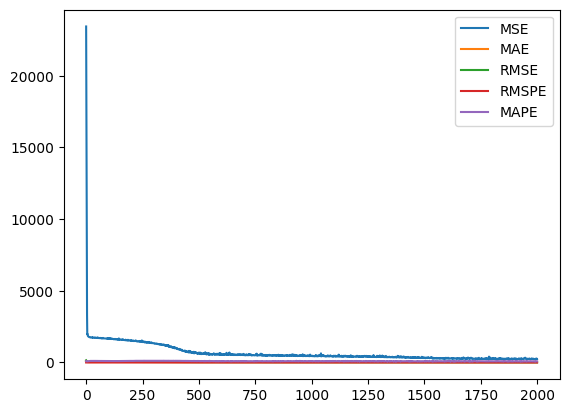

In [186]:
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['rmse'])
plt.plot(history.history['rmspe'])
plt.plot(history.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

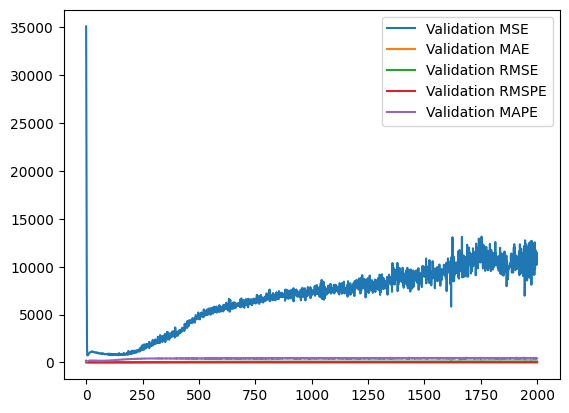

In [187]:
plt.plot(history.history['val_mse'])
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_rmse'])
plt.plot(history.history['val_rmspe'])
plt.plot(history.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

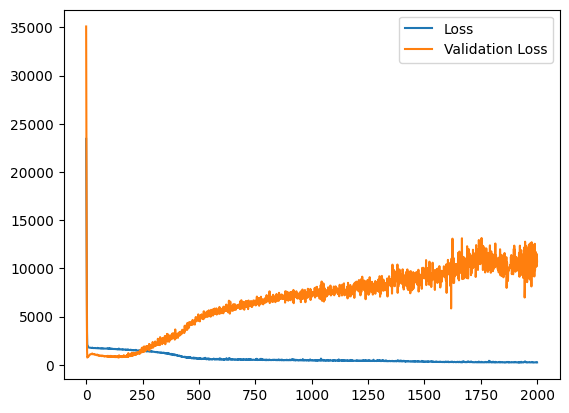

In [188]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

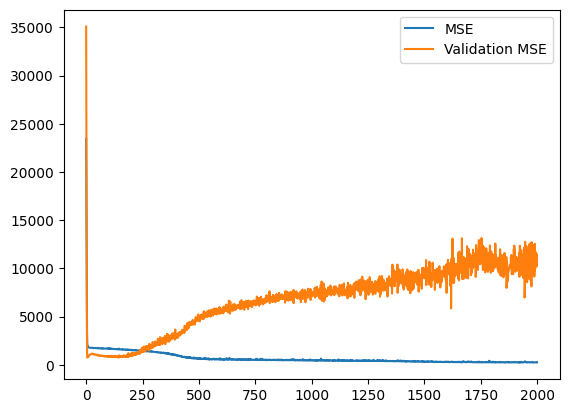

In [189]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.legend(['MSE', 'Validation MSE'])
plt.show()

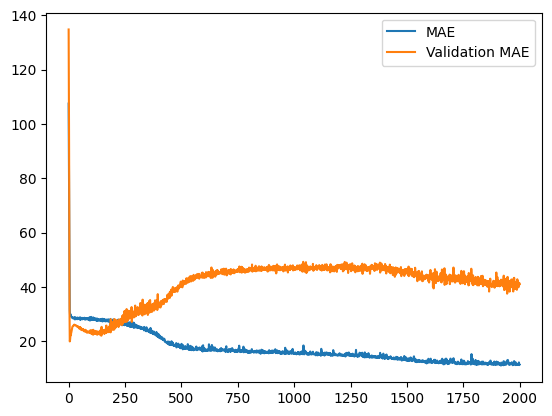

In [190]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

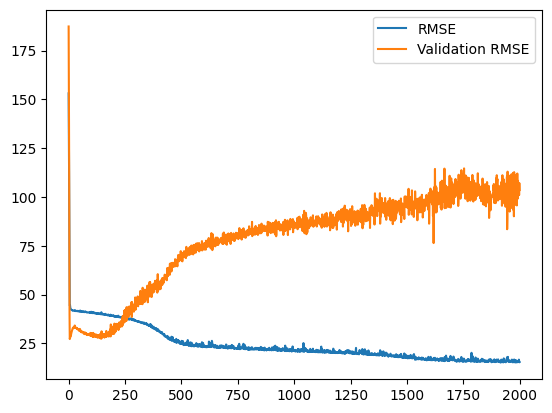

In [191]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

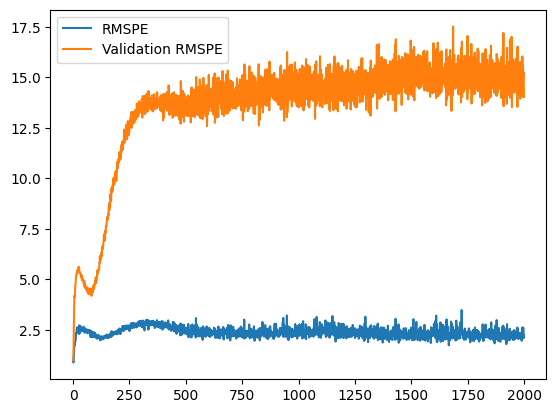

In [192]:
plt.plot(history.history['rmspe'])
plt.plot(history.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

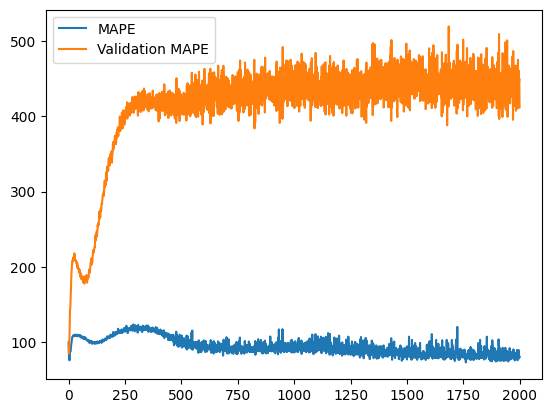

In [193]:
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

In [194]:
# predict all
def predict_all(model, X_test):
  preds = list()
  for x in X_test:
    x = x.reshape((1, n_steps, n_features))
    preds.extend(model.predict(x, verbose=0)[0])
  return preds

In [195]:
preds_wave = predict_all(model, X_test_wave)
print(preds_wave)

[238.47821, -209.05548, 280.63818, 313.6267, 347.35938, 367.0007, 301.0144, 146.62186, 227.89659, 265.4612, 286.8263, 316.59348, 344.24283, 343.51965, 328.64215, 340.52283, 302.22055, 185.62735, 67.66845, 120.4991, 80.23826, 51.140648, 136.39378, 84.5909, 238.11009, 26.031113, 26.783747, 0.055969775, -0.49643654, -21.149963, -40.41086, 64.20787, -2.0194678, -21.53533, 13.199291, -3.8046298, 3.823398, -6.874477, -24.229588, 16.01138, 24.341862, 26.53427, -1.9931369, -6.350923, -23.224833, -9.913373, -3.405704, 4.5486827, 14.639583, -172.97559]


In [196]:
for i in range(len(y_test_wave)):
	print(y_test_wave[i],"; ", preds_wave[i])

259.34625 ;  238.47821
291.25043 ;  -209.05548
303.17316 ;  280.63818
303.8913 ;  313.6267
322.94873 ;  347.35938
342.27032 ;  367.0007
268.96906 ;  301.0144
105.95526 ;  146.62186
227.63155 ;  227.89659
275.40613 ;  265.4612
280.28186 ;  286.8263
294.9622 ;  316.59348
312.2725 ;  344.24283
327.1114 ;  343.51965
323.62872 ;  328.64215
325.09076 ;  340.52283
282.6567 ;  302.22055
166.33841 ;  185.62735
102.90584 ;  67.66845
141.78458 ;  120.4991
35.547195 ;  80.23826
51.26801 ;  51.140648
154.25961 ;  136.39378
79.11373 ;  84.5909
158.31291 ;  238.11009
-2.2801514 ;  26.031113
0.25068665 ;  26.783747
-3.4431763 ;  0.055969775
-2.7544708 ;  -0.49643654
-4.457184 ;  -21.149963
-5.575119 ;  -40.41086
69.72061 ;  64.20787
-36.279507 ;  -2.0194678
-27.148926 ;  -21.53533
-3.6345367 ;  13.199291
1.7200012 ;  -3.8046298
-2.0410461 ;  3.823398
-3.459259 ;  -6.874477
-7.815201 ;  -24.229588
3.5432587 ;  16.01138
3.8369904 ;  24.341862
39.040924 ;  26.53427
6.648781 ;  -1.9931369
-5.9461937 ;  -6

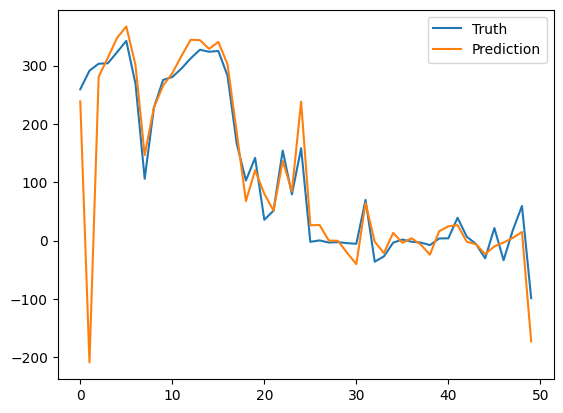

In [197]:
plt.plot(y_test_wave)
plt.plot(preds_wave)
plt.legend(['Truth', 'Prediction'])
plt.show()

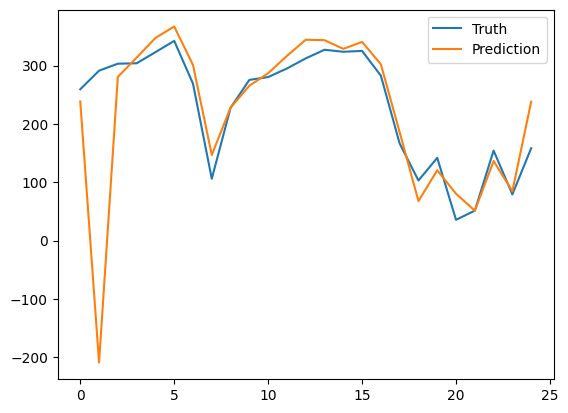

In [198]:
plt.plot(y_test_wave[:25])
plt.plot(preds_wave[:25])
plt.legend(['Truth', 'Prediction'])
plt.show()

In [199]:
preds_wave_cA = get_cA(preds_wave, num_level)
preds_wave_cD = get_cD(preds_wave, 1, num_level)
preds_wave_whole = (np.array(preds_wave_cA), np.array(preds_wave_cD))

In [200]:
preds_wave_whole

(array([ 238.47821 , -209.05548 ,  280.63818 ,  313.6267  ,  347.35938 ,
         367.0007  ,  301.0144  ,  146.62186 ,  227.89659 ,  265.4612  ,
         286.8263  ,  316.59348 ,  344.24283 ,  343.51965 ,  328.64215 ,
         340.52283 ,  302.22055 ,  185.62735 ,   67.66845 ,  120.4991  ,
          80.23826 ,   51.140648,  136.39378 ,   84.5909  ,  238.11009 ],
       dtype=float32),
 array([ 2.6031113e+01,  2.6783747e+01,  5.5969775e-02, -4.9643654e-01,
        -2.1149963e+01, -4.0410858e+01,  6.4207870e+01, -2.0194678e+00,
        -2.1535330e+01,  1.3199291e+01, -3.8046298e+00,  3.8233981e+00,
        -6.8744769e+00, -2.4229588e+01,  1.6011379e+01,  2.4341862e+01,
         2.6534269e+01, -1.9931369e+00, -6.3509231e+00, -2.3224833e+01,
        -9.9133730e+00, -3.4057040e+00,  4.5486827e+00,  1.4639583e+01,
        -1.7297559e+02], dtype=float32))

In [201]:
preds = (pywt.waverec(preds_wave_whole, wavelet))

In [202]:
preds

array([ 187.03635 ,  150.22278 , -128.88557 , -166.7635  ,  198.48074 ,
        198.40158 ,  221.41653 ,  222.11859 ,  230.66489 ,  260.57544 ,
        230.93387 ,  288.08347 ,  258.25113 ,  167.4475  ,  102.24933 ,
        105.105286,  145.91943 ,  176.375   ,  197.04274 ,  178.37611 ,
        200.12654 ,  205.5071  ,  226.56894 ,  221.16183 ,  238.55544 ,
        248.27742 ,  225.77217 ,  260.038   ,  243.70685 ,  221.06332 ,
        257.9983  ,  223.5737  ,  232.46475 ,  194.93964 ,  129.849   ,
        132.66772 ,   43.35804 ,   52.3396  ,   68.783295,  101.62816 ,
         49.727203,   63.746826,   33.753704,   38.570095,   99.66138 ,
         93.22856 ,   70.16654 ,   49.46305 ,   46.057053,  290.68146 ],
      dtype=float32)

In [203]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds[i])

181.7732 ;  187.03635
184.99782 ;  150.22278
206.1224 ;  -128.88557
205.76788 ;  -166.7635
211.9411 ;  198.48074
216.8105 ;  198.40158
212.9359 ;  221.41653
216.83131 ;  222.11859
225.20753 ;  230.66489
231.51094 ;  260.57544
238.07948 ;  230.93387
245.9639 ;  288.08347
239.48976 ;  258.25113
140.88992 ;  167.4475
49.2682 ;  102.24933
100.57517 ;  105.105286
141.76262 ;  145.91943
180.157 ;  176.375
192.17154 ;  197.04274
197.31155 ;  178.37611
199.40543 ;  200.12654
196.97299 ;  205.5071
207.12653 ;  226.56894
210.013 ;  221.16183
218.36394 ;  238.55544
223.25606 ;  248.27742
225.77652 ;  225.77217
236.82887 ;  260.038
231.34554 ;  243.70685
226.33461 ;  221.06332
232.58704 ;  257.9983
227.16072 ;  223.5737
227.47458 ;  232.46475
172.26237 ;  194.93964
122.32041 ;  129.849
112.91762 ;  132.66772
68.56082 ;  43.35804
76.97001 ;  52.3396
78.71203 ;  68.783295
121.80164 ;  101.62816
40.31911 ;  49.727203
9.952218 ;  63.746826
12.363579 ;  33.753704
60.140335 ;  38.570095
121.50542 ;  99.

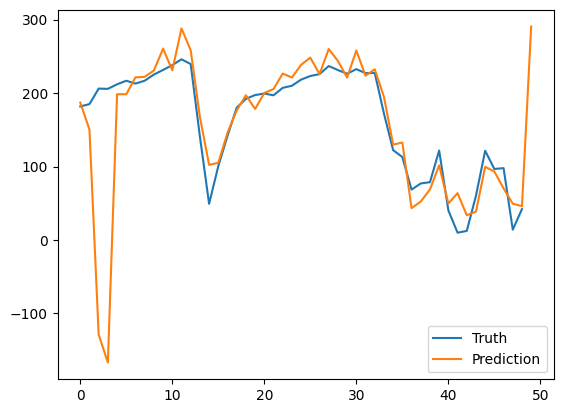

In [204]:
plt.plot(y_test)
plt.plot(preds)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [205]:
model.evaluate(X_test_wave, y_test_wave)

2/2 [==============================] - 0s 16ms/step - loss: 5677.4995 - mse: 5677.4995 - mae: 29.7357 - rmse: 75.3492 - rmspe: 10.5853 - mape: 332.0980


[5677.49951171875,
 5677.49951171875,
 29.735736846923828,
 75.34918212890625,
 10.585331916809082,
 332.0980224609375]

In [206]:
y_test_wave_cumsum = np.cumsum(y_test_wave)
y_test_wave_cumsum

array([ 259.34625,  550.5967 ,  853.76984, 1157.6611 , 1480.6099 ,
       1822.8801 , 2091.849  , 2197.8044 , 2425.436  , 2700.8423 ,
       2981.124  , 3276.0862 , 3588.3586 , 3915.47   , 4239.0986 ,
       4564.1895 , 4846.846  , 5013.1846 , 5116.0903 , 5257.875  ,
       5293.4224 , 5344.6904 , 5498.95   , 5578.064  , 5736.377  ,
       5734.0967 , 5734.347  , 5730.904  , 5728.1494 , 5723.6924 ,
       5718.117  , 5787.838  , 5751.5586 , 5724.4097 , 5720.775  ,
       5722.495  , 5720.454  , 5716.9946 , 5709.179  , 5712.7227 ,
       5716.5596 , 5755.6006 , 5762.2495 , 5756.303  , 5725.8345 ,
       5747.307  , 5713.524  , 5731.099  , 5790.3325 , 5691.579  ],
      dtype=float32)

In [207]:
preds_wave_cumsum = np.cumsum(preds_wave)
preds_wave_cumsum

array([ 238.47821,   29.42273,  310.0609 ,  623.6876 ,  971.047  ,
       1338.0477 , 1639.0621 , 1785.684  , 2013.5806 , 2279.0417 ,
       2565.8682 , 2882.4617 , 3226.7046 , 3570.224  , 3898.8662 ,
       4239.389  , 4541.61   , 4727.2373 , 4794.906  , 4915.405  ,
       4995.643  , 5046.7837 , 5183.1772 , 5267.768  , 5505.878  ,
       5531.909  , 5558.693  , 5558.749  , 5558.2524 , 5537.1025 ,
       5496.692  , 5560.9    , 5558.8804 , 5537.345  , 5550.5444 ,
       5546.7397 , 5550.563  , 5543.6885 , 5519.459  , 5535.47   ,
       5559.812  , 5586.346  , 5584.353  , 5578.002  , 5554.7773 ,
       5544.864  , 5541.458  , 5546.007  , 5560.6465 , 5387.671  ],
      dtype=float32)

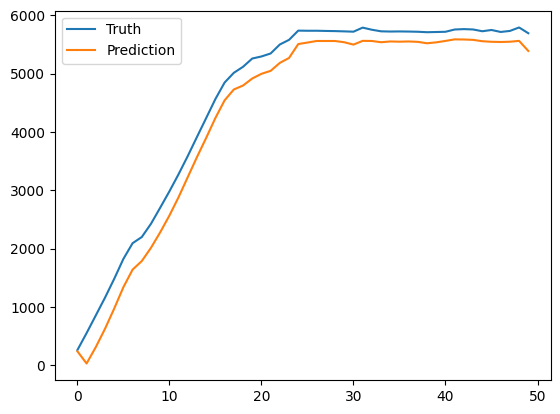

In [208]:
plt.plot(y_test_wave_cumsum)
plt.plot(preds_wave_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [209]:
rmspe_score_wave = rmspe(y_test_wave_cumsum, preds_wave_cumsum)
rmspe_score_wave

<tf.Tensor: shape=(), dtype=float32, numpy=0.19829942>

In [210]:
mape_score_wave = tf.keras.metrics.mean_absolute_percentage_error(y_test_wave_cumsum, preds_wave_cumsum)
mape_score_wave

<tf.Tensor: shape=(), dtype=float32, numpy=10.808932>

In [211]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([ 181.7732 ,  366.771  ,  572.89343,  778.6613 ,  990.6024 ,
       1207.413  , 1420.3489 , 1637.1802 , 1862.3877 , 2093.8987 ,
       2331.9783 , 2577.9421 , 2817.432  , 2958.3218 , 3007.59   ,
       3108.1653 , 3249.928  , 3430.085  , 3622.2566 , 3819.568  ,
       4018.9736 , 4215.947  , 4423.073  , 4633.0864 , 4851.45   ,
       5074.706  , 5300.4824 , 5537.3115 , 5768.657  , 5994.9917 ,
       6227.5786 , 6454.7393 , 6682.214  , 6854.476  , 6976.7964 ,
       7089.714  , 7158.275  , 7235.245  , 7313.957  , 7435.759  ,
       7476.078  , 7486.0303 , 7498.394  , 7558.534  , 7680.0396 ,
       7776.69   , 7874.516  , 7888.5737 , 7930.689  ], dtype=float32)

In [212]:
preds_cumsum = np.cumsum(preds)
preds_cumsum

array([ 187.03635 ,  337.25912 ,  208.37355 ,   41.610046,  240.09079 ,
        438.49237 ,  659.90894 ,  882.0275  , 1112.6924  , 1373.2678  ,
       1604.2017  , 1892.2852  , 2150.5364  , 2317.984   , 2420.2332  ,
       2525.3384  , 2671.2578  , 2847.6328  , 3044.6755  , 3223.0518  ,
       3423.1782  , 3628.6853  , 3855.2542  , 4076.416   , 4314.9717  ,
       4563.249   , 4789.021   , 5049.059   , 5292.766   , 5513.8296  ,
       5771.828   , 5995.402   , 6227.8667  , 6422.806   , 6552.6553  ,
       6685.323   , 6728.681   , 6781.0205  , 6849.8037  , 6951.4316  ,
       7001.1587  , 7064.9053  , 7098.659   , 7137.2295  , 7236.8906  ,
       7330.119   , 7400.2856  , 7449.7485  , 7495.8057  , 7786.4873  ],
      dtype=float32)

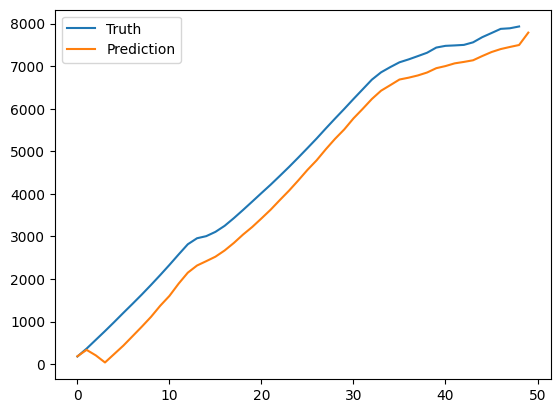

In [213]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [214]:
rmspe_score = rmspe(y_test_cumsum, preds_cumsum[:49])
rmspe_score

<tf.Tensor: shape=(), dtype=float32, numpy=0.27547923>

In [215]:
mape_score = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum[:49])
mape_score

<tf.Tensor: shape=(), dtype=float32, numpy=18.697174>

In [216]:
model.save('cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf')

In [217]:
!zip -r /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf".zip /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf"

updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/ (stored 0%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/keras_metadata.pb (deflated 89%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/variables/ (stored 0%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/variables/variables.index (deflated 66%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/variables/variables.data-00000-of-00001 (deflated 18%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/fingerprint.pb (stored 0%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/assets/ (stored 0%)
updating: content/cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf/saved_model.pb (deflated 87%)


In [218]:
loaded_1 = tf.keras.models.load_model("cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf")

ValueError: ignored

In [ ]:
loaded_1.evaluate(X_test, y_test)

# data -> frequency

In [ ]:
def get_wave(data, mode, num_level):
  wave = []
  for i in range(len(data)):
    wave.append(pywt.wavedec([data[i]], mode, level = num_level))
  return np.array(wave).T[0]

In [ ]:
mode = 'haar'

## 1 levels

In [ ]:
num_level = 1

In [ ]:
lc_wave1 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave1

In [ ]:
# Plot cA
plt.plot(lc_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave1[1])
plt.show()

## 2 levels

In [ ]:
num_level = 2

In [ ]:
lc_wave2 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave2

In [ ]:
# Plot cA
plt.plot(lc_wave2[0])
plt.show()

In [ ]:
# Plot cD1
plt.plot(lc_wave2[1])
plt.show()

In [ ]:
# Plot cD2
plt.plot(lc_wave2[2])
plt.show()

## 3 levels

In [ ]:
num_level = 3

In [ ]:
lc_wave3 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave3

In [ ]:
# Plot cA
plt.plot(lc_wave3[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave3[1])
plt.show()

In [ ]:
plt.plot(lc_wave1[0])
plt.plot(lc_wave2[0])
plt.plot(lc_wave3[0])
plt.legend(['A1', 'A2', 'A3'])
plt.show()

# **Temperature**

# data -> frequency

## level 1

In [ ]:
num_level = 1

In [ ]:
temp_wave1 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave1

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave1[1])
plt.show()

## level 2

In [ ]:
num_level = 2

In [ ]:
temp_wave2 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave2

In [ ]:
# Plot cA
plt.plot(temp_wave2[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave2[1])
plt.show()

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.plot(temp_wave2[0])
plt.show()